In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Generation 

In [7]:
observations = 100000

# the inputs will take in two variables. X and Z makes it easy to differentiate them.
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

# Combine the two variables into one input matrix which becomes the X in the linear model y = x*w + b
generated_inputs = np.column_stack((xs,zs))

# A small noise is added to the function to change all the time and get less generalization error.
noise = np.random.uniform(-1,1, (observations,1))

# Produce targets according to the f(x,z) = 2x - 3z + 5 + noise function.
generated_targets = 2*xs - 3*zs + 5 + noise

# Save it into a npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow 

In [8]:
# The shape of the data which we've prepared above. Think of it as: number of inputs, number of outputs
input_size = 2
output_size = 1

### Outlining the model

In [9]:
# Define the TensorFlow placeholder. The data in here does not retain afterwards.
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

# Define the weights and biases. This time we use a Tensorflow object, the variable. Variables, unlike placeholders,
# preserve their values for each iteration
weights = tf.Variable(tf.random.uniform([input_size, output_size], minval=-0.1,maxval=0.1))
biases = tf.Variable(tf.random.uniform([output_size], minval=-0.1,maxval=0.1))

# Lastly, we get the outputs using the linear model combination y = xw + b
# The tf.matmul is the same as np.dot but just made for tensorflow.
outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and the optimization method

In [12]:
# To get the mean loss, we use the loss function. This time though, it's readily available
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.

# Instead of implementing our own Gradient Descent, we use TensorFlows optimizer
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Prepare for execution

In [13]:
session = tf.InteractiveSession()

### Initializing variables

In [14]:
initializer = tf.global_variables_initializer()

session.run(initializer)

### Loading training data

In [15]:
training_data = np.load('TF_intro.npz')

### Learning

In [16]:
for e in range(100):
    _,curr_loss = session.run([optimize, mean_loss],
                          feed_dict = {inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

237.64194
114.61008
57.56644
30.886305
18.202362
11.99098
8.791332
7.009534
5.909788
5.1509533
4.573544
4.101833
3.6988282
3.3455625
3.0315444
2.750352
2.4975903
2.2699404
2.0647004
1.879569
1.7125326
1.5618021
1.4257772
1.3030179
1.1922289
1.0922425
1.0020047
0.9205647
0.8470647
0.78073037
0.7208636
0.6668336
0.6180715
0.5740627
0.5343451
0.49849972
0.46614894
0.43695235
0.4106019
0.3868207
0.36535808
0.34598783
0.32850602
0.31272885
0.2984896
0.28563878
0.27404082
0.2635735
0.2541266
0.24560101
0.2379065
0.23096204
0.2246948
0.21903841
0.21393381
0.2093266
0.20516865
0.20141606
0.19802935
0.19497277
0.19221425
0.18972465
0.18747781
0.18544996
0.18361984
0.18196806
0.18047743
0.17913215
0.17791793
0.17682216
0.17583315
0.1749407
0.17413516
0.17340809
0.17275201
0.17215987
0.17162547
0.17114313
0.17070785
0.17031504
0.16996045
0.16964047
0.16935171
0.16909109
0.16885586
0.16864355
0.16845198
0.16827902
0.16812299
0.16798213
0.16785504
0.16774032
0.16763678
0.16754332
0.16745903
0.16738

### Plotting the data

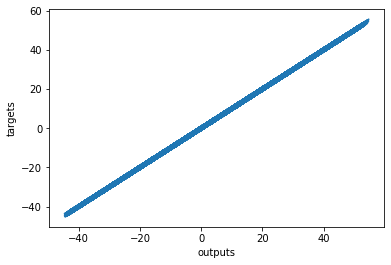

In [17]:
out = session.run([outputs], feed_dict={inputs:training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [18]:
w = session.run([weights], feed_dict = {inputs: training_data['inputs']})

b = session.run([biases], feed_dict = {inputs: training_data['inputs']})

print(w)
print(b)

[array([[ 2.0001218],
       [-3.0000246]], dtype=float32)]
[array([4.968677], dtype=float32)]
